# Implementing Resnet8 architecture on Dronet Dataset


## Objective

The objective is to implement the ResNet 8 architecture on Dronet dataset. This dataset contains Collision (**approx. 4.8K**) and non-collision images (**approx. 24.9K**). 

#### Model Used: ResNet8
Resnet architecture employs the power of skip connections to tackle the problem of vanishing gradients without an exponential increase in the number of parameters for deep networks.

Let's install the required tensorflow library (the implementation is done in tensorflow).

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Now, let's import the required libraries. We are using the following libraries:
- PIL (Python Imaging Library): Library to manipulate image input data
- Numpy: To manipulate vector representations of image data
- Tensorflow: To implement machine learning via resnet architecture
- Keras: It acts as an interface to interact with tensorflow

In [2]:
import os

from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

In [3]:
train_positive_dir = r"C:\Users\risha\OneDrive\Documents\me\CORAL\train_data\Collision" 
train_negative_dir = r"C:\Users\risha\OneDrive\Documents\me\CORAL\train_data\Not_Collision"

test_positive_dir = r"C:\Users\risha\OneDrive\Documents\me\CORAL\test_data\Collision"
test_negative_dir = r"C:\Users\risha\OneDrive\Documents\me\CORAL\test_data\Not_Collision"

train_positive_count = len(os.listdir(train_positive_dir))
train_negative_count = len(os.listdir(train_negative_dir))
test_positive_count = len(os.listdir(test_positive_dir))
test_negative_count = len(os.listdir(test_negative_dir))

train_count = train_positive_count + train_negative_count
test_count = test_positive_count + test_negative_count


# calculate class weights

posivite_weight = train_count / train_positive_count / 2.0
negative_weight = train_count / train_negative_count / 2.0

class_weight = {0: negative_weight, 1: posivite_weight}

print("Found", train_count, "train samples:", train_positive_count, "positive,", train_negative_count, "negative")
print("Found", test_count, "test samples:", test_positive_count, "positive,", test_negative_count, "negative")
print("Class weight:", class_weight)


# load train/test data

x_train = []
y_train = []
w_train = []
x_test = []
y_test = []




def load_data(directory, train_flag, positive_flag):
    temp = 0
    if train_flag == 1 and positive_flag == 1:
        print("------ Loading Positive Train Set ------") 
        count = train_positive_count
    elif train_flag == 1 and positive_flag == 0:
        print("------ Loading Negative Train Set ------") 
        count = train_negative_count
    elif train_flag == 0 and positive_flag == 1:
        print("------ Loading Positive Test Set ------") 
        count = test_positive_count
    else:
        print("------ Loading Negative Test Set ------") 
        count = test_negative_count
        
    if positive_flag == 1:
        weight = posivite_weight
        label = 1
    else:
        weight = negative_weight
        label = 0
        
   
    for file in os.listdir(directory):
        filename = os.path.join(directory, file)
        #Converting RGB images to greyscale and cropping image size to 200X200
        image = Image.open(filename).convert("L").resize((200, 200))
        image = np.asarray(image)
        if train_flag == 1:
            x_train.append(image)
            y_train.append(label)
            w_train.append(weight)
        else:
            x_test.append(image)
            y_test.append(label)
        temp += 1
        if temp % 1000 == 0 or temp == count:
            print(temp, "of", count)
    print("-------- Data Load Completed -----------")
            
load_data(train_positive_dir,1, 1)
load_data(train_negative_dir,1, 0)
load_data(test_positive_dir,0,1)
load_data(test_negative_dir,0,0)
        

x_train = np.array(x_train, dtype=np.float32)[..., tf.newaxis] / 255.0
y_train = np.array(y_train, dtype=np.float32)
w_train = np.array(w_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)[..., tf.newaxis] / 255.0
y_test = np.array(y_test, dtype=np.float32)

Found 10576 train samples: 4876 positive, 5700 negative
Found 1576 test samples: 353 positive, 1223 negative
Class weight: {0: 0.927719298245614, 1: 1.0844954881050042}
------ Loading Positive Train Set ------
1000 of 4876
2000 of 4876
3000 of 4876
4000 of 4876
4876 of 4876
-------- Data Load Completed -----------
------ Loading Negative Train Set ------
1000 of 5700
2000 of 5700
3000 of 5700
4000 of 5700
5000 of 5700
5700 of 5700
-------- Data Load Completed -----------
------ Loading Positive Test Set ------
353 of 353
-------- Data Load Completed -----------
------ Loading Negative Test Set ------
1000 of 1223
1223 of 1223
-------- Data Load Completed -----------


In [22]:
print(len(x_train))
print(x_train[0])

10576
[[[0.99607843]
  [0.99607843]
  [0.99607843]
  ...
  [0.21568628]
  [0.21568628]
  [0.20784314]]

 [[0.99607843]
  [0.99607843]
  [0.99607843]
  ...
  [0.21176471]
  [0.20784314]
  [0.20784314]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.20784314]
  [0.20784314]
  [0.20392157]]

 ...

 [[0.54901963]
  [0.54901963]
  [0.54509807]
  ...
  [0.20392157]
  [0.20392157]
  [0.2       ]]

 [[0.5372549 ]
  [0.5372549 ]
  [0.5411765 ]
  ...
  [0.22352941]
  [0.20392157]
  [0.20784314]]

 [[0.5372549 ]
  [0.5254902 ]
  [0.52156866]
  ...
  [0.32156864]
  [0.25490198]
  [0.21960784]]]


In [4]:
print(x_train.shape, np.max(x_train), np.min(x_train))
print(y_train.shape, np.max(y_train), np.min(y_train))
print(w_train.shape, np.max(w_train), np.min(w_train))
print(x_test.shape, np.max(x_test), np.min(x_test))
print(y_test.shape, np.max(y_test), np.min(y_test))

(10576, 200, 200, 1) 1.0 0.0
(10576,) 1.0 0.0
(10576,) 1.0844955 0.9277193
(1576, 200, 200, 1) 1.0 0.0
(1576,) 1.0 0.0


In [5]:
def resnet8(img_width, img_height, img_channels, output_dim):
    #Let's define input
    img_input = Input(shape= (img_height, img_width, img_channels))
    #print(img_input)
    
    l1 = Conv2D(32, (5,5), strides = [2,2], padding = "same")(img_input)
    l1 = MaxPooling2D((3,3), strides = [2,2])(l1)
    
    #First residual block
    r1 = BatchNormalization()(l1)
    r1 = Activation('relu')(r1)
    r1 = Conv2D(32, (3,3), strides = [2,2], padding = "same", kernel_initializer = 'he_normal', 
                kernel_regularizer = regularizers.l2(1e-4))(r1)
    
    r1 = BatchNormalization()(r1)
    r1 = Activation('relu')(r1)
    r1 = Conv2D(32, (3,3), strides = [2,2], padding = "same", kernel_initializer = 'he_normal',
               kernel_regularizer = regularizers.l2(1e-4))(r1)
    
    #passing input through a 1X1 convolution layer with stride 2 to make the shape equal to residual bloack
    l1 = Conv2D(32, (1,1), strides = [2,2], padding = "same")(l1)
    sk_conn1 = Conv2D(32, (1,1), strides = [2,2], padding = "same")(l1)
    
    #doing F(x)+x i.e. adding skip connection for residual block 1
    print(sk_conn1.shape)
    print(r1.shape)
    x1 = tf.keras.layers.Add()([sk_conn1, r1])
    
    #Seconnd residual block    
    r2 = BatchNormalization()(x1)
    r2 = Activation('relu')(r2)
    r2 = Conv2D(64, (3,3), strides = [2,2], padding = "same", kernel_initializer = "he_normal",
               kernel_regularizer = regularizers.l2(1e-4))(r2)
    
    r2 = BatchNormalization()(r2)
    r2 = Activation('relu')(r2)
    r2 = Conv2D(64, (3,3), strides = [2,2], padding = "same", kernel_initializer = "he_normal",
               kernel_regularizer = regularizers.l2(1e-4))(r2)
    
    #passing input through a 1X1 convolution layer with stride 2 to make the shape equal to residual bloack
    sk_conn1 = Conv2D(32, (1,1), strides = [2,2], padding = "same")(sk_conn1)
    sk_conn2 = Conv2D(64, (1,1), strides = [2,2], padding = "same")(sk_conn1)
    
    #doing F(x)+x i.e. adding skip connection for residual block 2
    x2 = tf.keras.layers.Add()([sk_conn2, r2])
    
    #Third residual block
    r3 = BatchNormalization()(x2)
    r3 = Activation('relu')(r3)
    r3 = Conv2D(128, (3,3), strides = [2,2], padding = "same", kernel_initializer = "he_normal",
               kernel_regularizer = regularizers.l2(1e-4))(r3)
    
    r3 = BatchNormalization()(r3)
    r3 = Activation('relu')(r3)
    r3 = Conv2D(128, (3,3), strides = [2,2], padding = "same", kernel_initializer = "he_normal",
               kernel_regularizer = regularizers.l2(1e-4))(r3)
    
    sk_conn3 = Conv2D(128, (1,1), strides = [2,2], padding = "same")(sk_conn2)
    
    #doing F(x)+x i.e. adding skip connection for residual block 3
    x3 = tf.keras.layers.Add()([sk_conn3, r3])
    
    x = Flatten()(x3)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    coll = Dense(output_dim)(x)
    coll = Activation('sigmoid')(coll)
    
    model = Model(inputs = [img_input], outputs = [coll])
    
    return model
    
    
    
    

In [6]:
model = resnet8(200, 200, 1, 1)
print(model.summary())
optimizer = tf.keras.optimizers.Adam(decay=1e-5)
model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.save(r'C:\Users\risha\Documents\Dronet_model')
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32)





(None, 13, 13, 32)
(None, 13, 13, 32)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 32  832         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 49, 49, 32)   0           ['conv2d[0][0]']                 
                                                        

Total params: 311,713
Trainable params: 311,009
Non-trainable params: 704
__________________________________________________________________________________________________
None


INFO:tensorflow:Assets written to: C:\Users\risha\Documents\Dronet_model\assets


INFO:tensorflow:Assets written to: C:\Users\risha\Documents\Dronet_model\assets


Epoch 1/20
331/331 [==============================] - 44s 129ms/step - loss: 0.1956 - accuracy: 0.9535
Epoch 2/20
331/331 [==============================] - 46s 138ms/step - loss: 0.0995 - accuracy: 0.9921
Epoch 3/20
331/331 [==============================] - 46s 139ms/step - loss: 0.0809 - accuracy: 0.9974
Epoch 4/20
331/331 [==============================] - 46s 140ms/step - loss: 0.0869 - accuracy: 0.9946
Epoch 5/20
331/331 [==============================] - 46s 138ms/step - loss: 0.0795 - accuracy: 0.9970
Epoch 6/20
331/331 [==============================] - 46s 138ms/step - loss: 0.0680 - accuracy: 0.9988
Epoch 7/20
331/331 [==============================] - 48s 144ms/step - loss: 0.0776 - accuracy: 0.9953
Epoch 8/20
331/331 [==============================] - 47s 141ms/step - loss: 0.0658 - accuracy: 0.9982
Epoch 9/20
331/331 [==============================] - 49s 149ms/step - loss: 0.0600 - accuracy: 0.9991
Epoch 10/20
331/331 [==============================] - 48s 145ms/step - l

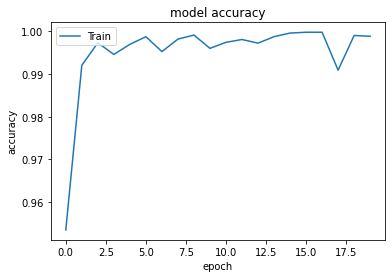

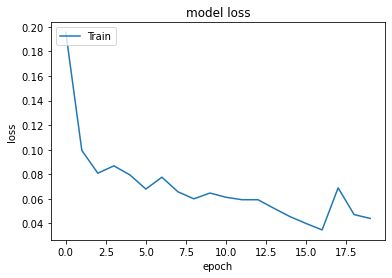

In [7]:
# summarize history for accuracy
print(history)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

As evident from the above graphs, the model is successfully trained to minimize loss over the training data. We see some instances where accuracy sees a dip and then increases, that might be due to overfitting of training data by the model.

Let's try our trained model on the test dataset.

In [8]:
model.evaluate(x_test, y_test)

50/50 [==============================] - 2s 36ms/step - loss: 1.4412 - accuracy: 0.8350


[1.4411637783050537, 0.8350253701210022]